## Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

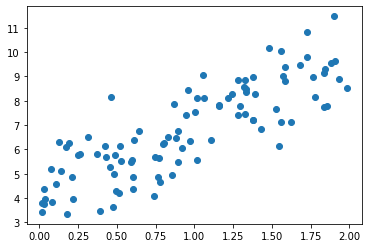

In [3]:
plt.scatter(X, y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.18938101],
       [2.74833827]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.18938101],
       [9.68605755]])

(0.0, 2.0, 0.0, 15.0)

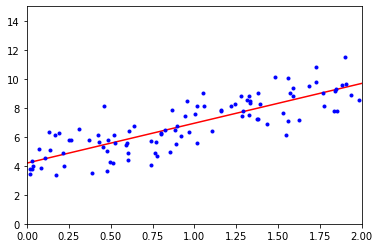

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([4.18938101]), array([[2.74833827]]))

In [10]:
lin_reg.predict(X_new)

array([[4.18938101],
       [9.68605755]])

## Gradient Descent

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [12]:
y.shape, y.ravel().shape

((100, 1), (100,))

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1740174]), array([2.74471468]))

## Polynomial Regression

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

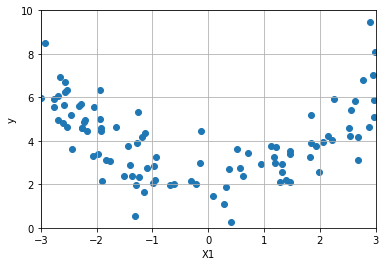

In [15]:
plt.scatter(X, y)
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([-3, 3, 0, 10])
plt.grid()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-2.45080202]), array([-2.45080202,  6.00643052]))

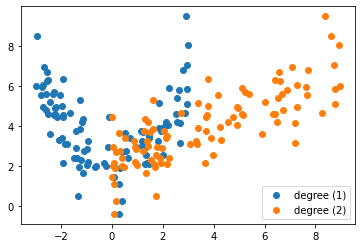

In [17]:
plt.scatter(X_poly[:, 0], y, label="degree (1)")
plt.scatter(X_poly[:, 1], y, label="degree (2)")
plt.legend()

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10384586]), array([[-0.06937852,  0.50688991]]))

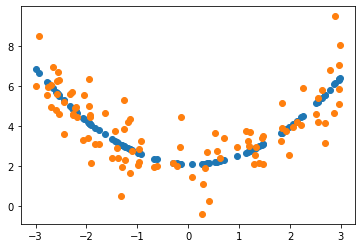

In [19]:
y_pred = lin_reg.predict(X_poly)
plt.scatter(X, y_pred)
plt.scatter(X, y)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylabel("RMSE")
    plt.legend()

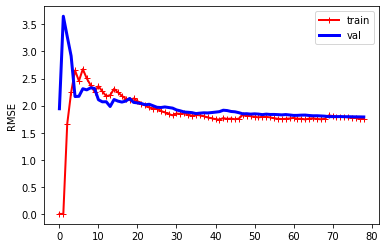

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

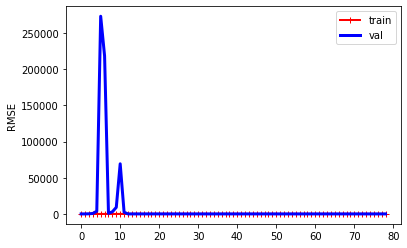

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]
)
plot_learning_curves(polynomial_regression, X, y)

## Regularized Linear Model

- polynomial model can be regularized by reducing the number of polynomial degree
- linear model can be regularized by constraining the weights of the model
  - ridge regression ($a$ = 0, becomes linear regression)
  - lasso regression
  - elastic net

### Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[3.86732518]])

In [24]:
from sklearn.linear_model import SGDRegressor

# Using penalty l2 is essentially Ridge regression
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.84682705])

### Lasso Regression

Uses the $l_i$ norm of the weight vector instead of half the square of $l_2$ norm (Ridge regression).

In [25]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y.ravel())
lasso_reg.predict([[1.5]])

array([3.91570637])

In [26]:
# Using penalty l1 is essentially Lasso regression
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.85219809])

## Elastic Net

- mixes both Ridge and Lasso's regularization term
- the mix ratio is $r$, $r=0$ equals Ridge Regression, $r=1$ equals Lasso Regression
- prefer Lasso or Elastic Net because they tend to reduce the useless features weights down to zero
- prefer Elastic Net over Lasso, because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

In [27]:
from sklearn.linear_model import ElasticNet

# The l1_ratio corresponds to the mix ratio "r"
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([3.89258068])

### Early Stopping

In [31]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)

# Prepare the data
poly_scaler = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ]
)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
)

minimum_val_error = float("inf")
best_epoch = None
best_model = None


for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression

In [33]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [100]:
X = iris["data"][:, 3:]  # Petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [101]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Probability')

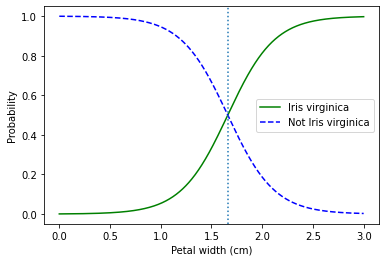

In [102]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
prob_50 = np.argmax(y_proba[:, 1] >= 0.5)
plt.axvline(X_new[prob_50], linestyle=":")
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

In [103]:
# 50% chance at
X_new[prob_50]

array([1.66066066])

In [126]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [175]:
X = iris["data"][:, 2:]  # Petal width and length
y = iris["target"]

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

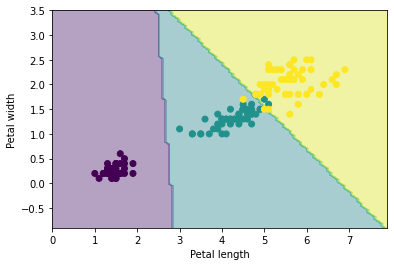

In [176]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    log_reg,
    X,
    alpha=0.4,
    response_method="predict",
    xlabel="Petal length",
    ylabel="Petal width",
)
plt.scatter(X[:, 0], X[:, 1], c=y)

### Softmax Regression

In [171]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [172]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

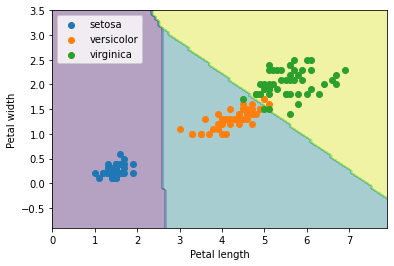

In [194]:
DecisionBoundaryDisplay.from_estimator(
    softmax_reg,
    X,
    alpha=0.4,
    response_method="predict",
    xlabel="Petal length",
    ylabel="Petal width",
)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label=iris.target_names[0])
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label=iris.target_names[1])
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label=iris.target_names[2])
plt.legend()